In [12]:
import pandas as pd
from IPython.display import clear_output

file = pd.ExcelFile("Market.xlsx")
print("Sheets available in the excel\n",file.sheet_names)


Sheets available in the excel
 ['stats', '2018_Market', '2019_Market', '2020_Market', '2021_Market']


In [ ]:
#cols = [0, 2, 7]
#sheet = file.parse("stats", usecols=cols)#assigning specific sheet name & cloumns to access 

sheet = file.parse("stats")
print("type of sheet: ",type(sheet))
print("Content in the sheet:\n",sheet)


#### There is no major difference between ExcelFile and read_excel funtion,
https://stackoverflow.com/questions/26474693/excelfile-vs-read-excel-in-pandas

##### Accessing specific columns from the excel

In [ ]:
cols = [0, 2, 3, 4, 5, 6, 7]

df = pd.read_excel("Market.xlsx", usecols=cols)
print("'df' is of type: ", type(df))
print("\nPrinting specific columns: \n",df)



##### Code for pulling date, Units puschased when growth rate was > 100 

In [ ]:
#below 2 lines of code will display selected columns from the excel
cols = [0, 2, 7]
df = pd.read_excel("Market.xlsx", usecols=cols)

print("Data showing when Growth rate is above 100%:\n",df.loc[df["GrowthRate"] > 100])

print("\n Avera rate of NAV:",df.NAVperUnit.mean())

print("\n Average of growth rate:",df.GrowthRate.mean())

In [5]:
#### Graphical representation of market observation
#### ploting graph for growth 

#### NOTE: Below code extract only month-year format from actual date 'NAV_as_on'


In [6]:
stats1 = file.parse("stats")
#stats1 is a DataFrame which has excel sheet 'stats' all the data.
print("Data type of stats1 is: ",type(stats1))
#print(stats1)

#NOTE: Below code extract only month-year format from actual date 'NAV_as_on'
# 'MnthYr' is a new column in the Dataframe and will be appended in the end.

stats1['MnthYr'] = pd.to_datetime(stats1['NAV_as_on']).dt.strftime('%m-%Y')
#print(stats1)

var = stats1.loc[stats1["GrowthRate"] > 100]["MnthYr"]
var2 = stats1.loc[stats1["GrowthRate"] > 100]["GrowthRate"]
#print(var, var2)

Data type of stats1 is:  <class 'pandas.core.frame.DataFrame'>


In [ ]:
#### Below code to draw graph for the  growth rate above 100

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=20,10 #this line of code is used to set the graph size

plt.xticks(fontsize=13 )#Used to set font size of the x-axis 
plt.yticks(fontsize=15 )#Used to set font size of the y-axis 

plt.xlabel('month/year')#Will display month-year on x-axis
plt.ylabel('growth')#Will display growth rate on y-axis
plt.title('Growth >100' )

plt.plot(var,var2)
plt.show() #This graph show when the market growth was > 100%

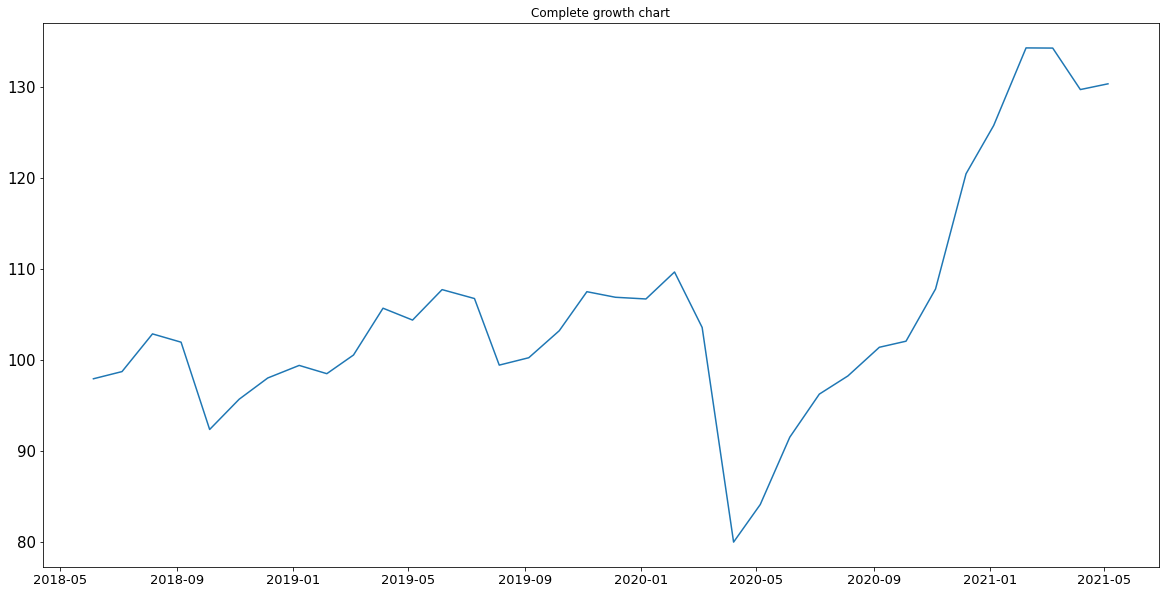

In [63]:
#### Below code to draw graph for the complete growth chart

stats1 = file.parse("stats")
#stats1['Yr'] = pd.to_datetime(stats1['NAV_as_on']).dt.strftime('%Y')

#var = stats1.loc[stats1['GrowthRate']]['yr']
#var2 = stats1.loc[stats1['GrowthRate']]['GrowthRate']

import matplotlib.pyplot as plt

plt.rcParams['figure.figsize']=20,10

plt.xticks(fontsize=13)
plt.yticks(fontsize=15)

x1 = stats1['NAV_as_on']
y1 = stats1['GrowthRate']

#print(x1, x2)

plt.title('Complete growth chart')
plt.plot(x1,y1)
plt.show()

In [ ]:
#### Below code is used to display growth rate for the year 2018 
#### from 'stats' and '2018_market' sheets

stats1 = file.parse("2018_Market")
#print(stats1)

stats1 = pd.DataFrame(stats1)
start_date = '2018-01-01'
end_date ='2018-12-31'

mask = (stats1['NAV_as_on'] > start_date) & (stats1['NAV_as_on'] < end_date)

stats1 = stats1.loc[mask]
#print(stats1)

import matplotlib.pyplot as plt

plt.rcParams['figure.figsize']=10,5


x1 = stats1['NAV_as_on']
y1 = stats1['GrowthRate']

plt.plot(x1,y1)
plt.bar(x1,y1)
plt.show()


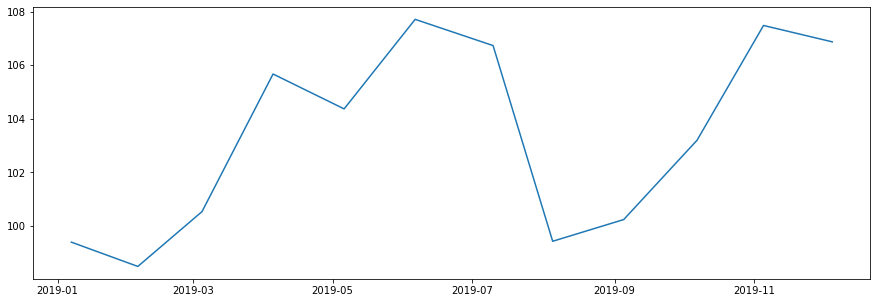

In [77]:
#### Below code is used to display growth rate for the year 2018 
#### from 'stats' and '2019_market' sheets

stats2 = file.parse("2019_Market")
#print(stats2)

#stats2 = pd.DataFrame(stats2)
#start_date = '2019-01-01'
#end_date ='2019-12-31'

#mask = (stats2['NAV_as_on'] > start_date) & (stats1['NAV_as_on'] < end_date)

#stats2 = stats2.loc[mask]
#print(stats2)

import matplotlib.pyplot as plt

plt.rcParams['figure.figsize']=15,5


x2 = stats2['NAV_as_on']
y2 = stats2['GrowthRate']

plt.plot(x2,y2)
#plt.bar(x2,y2)
plt.show()


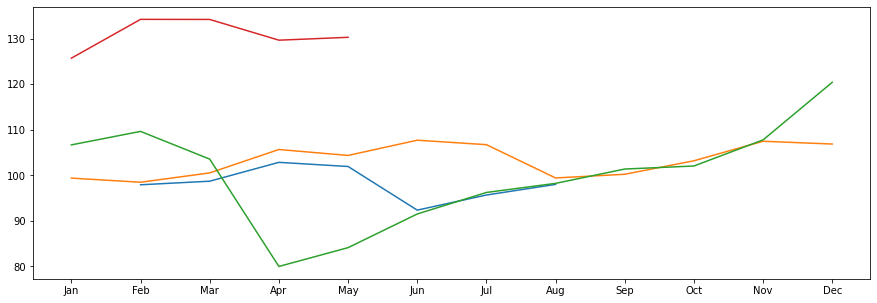

In [85]:
#### Below code is used to display growth rate for the year 2018-to-21 years sheet-wise 

stats1 = file.parse("2018_Market")
stats2 = file.parse("2019_Market")
stats3 = file.parse("2020_Market")
stats4 = file.parse("2021_Market")

import matplotlib.pyplot as plt

#x1 = ["May", "Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
y1 = stats1['GrowthRate']

#x2 = stats2['NAV_as_on']
x2 = ["Jan","Feb","Mar","Apr","May", "Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
y2 = stats2['GrowthRate']


#x3 = stats3['NAV_as_on']
y3 = stats3['GrowthRate']

#x4 = stats4['NAV_as_on']
y4 = stats4['GrowthRate']


plt.plot(y1)  
plt.plot(x2,y2)
plt.plot(x2,y3)
plt.plot(y4)
plt.show()

#not able to plot for the sheet "2018_Market" coz 
#x-axis , y-axis should have same data point as we have it for "2019-20_Market", 
#instead we can only plot y-axis of "2018-Market" only